#Import libraries

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Exe. 1 Upload the price data set, data.csv using pandas. Check the uploaded dataset and its different columns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv
Saving poems.txt to poems.txt
Saving sherlock_holmes.txt to sherlock_holmes.txt


In [ ]:
df =  pd.read_csv('./data.csv', header=0,error_bad_lines=False)
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [ ]:
df.shape

(851264, 7)

In [ ]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

# Get a subset of dataset, contaning YHOO symbol. name this subset of data as yahoo. Get only the high column values (6th column) and save them in a variable namely yahoo stock prices, and demonstrate high values in a graph.

In [ ]:
yahoo= df[df['symbol']=='YHOO']
yahoo

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
...,...,...,...,...,...,...,...
849257,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0
849757,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
850257,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
850757,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0


In [ ]:
yahoo_stock_prices=yahoo['high']
yahoo_stock_prices

713       17.200001
1181      17.230000
1649      17.299999
2117      16.900000
2585      16.760000
            ...    
849257    38.810001
849757    39.070000
850257    39.220001
850757    38.930000
851257    39.000000
Name: high, Length: 1762, dtype: float64

In [ ]:
yahoo_stock_prices.shape


(1762,)

In [ ]:
yahoo_stock_prices = np.array(yahoo_stock_prices).reshape(yahoo_stock_prices.shape[0], 1)
yahoo_stock_prices.shape

(1762, 1)

In [ ]:
yahoo_stock_prices

array([[17.200001],
       [17.23    ],
       [17.299999],
       ...,
       [39.220001],
       [38.93    ],
       [39.      ]])

### Graph for yahoo_stock_prices

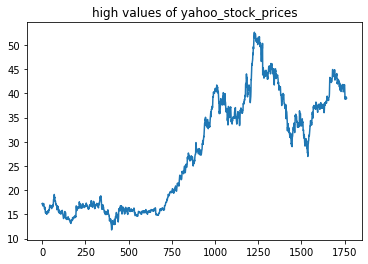

In [ ]:
plt.plot(yahoo_stock_prices)
plt.title("high values of yahoo_stock_prices")
plt.show()

we can observe that stock prices are higher in the range 1250-1500

#Exe. 3 Now divide the yahoo stock prices into train and test variables.
For instance 80% for train and 20% for the test set. Do NOT shuffle the data
set because it is a sequential dataset and the its order is important

In [ ]:
train_size= int(0.8*len(yahoo_stock_prices))
train_size

1409

In [ ]:
train= yahoo_stock_prices[:train_size,:]
train.shape

(1409, 1)

In [ ]:
train

array([[17.200001],
       [17.23    ],
       [17.299999],
       ...,
       [37.709999],
       [37.52    ],
       [36.759998]])

In [ ]:
test= yahoo_stock_prices[train_size:,:]
test.shape

(353, 1)

#Exe. 4 Since, the sequential data are dependent to their previous data, we have to remodel train and test dataset. How does it work?

In [ ]:
import numpy as np
def create_dataset ( dataset , look_back ):
  dataX=[]
  dataY=[]
  for i in range(len(dataset)-look_back):
    dataX.append(dataset[i:i+look_back,0])
    dataY.append(dataset[i+look_back,0])
  return dataX , dataY

In [ ]:
look_back=2
X_train,y_train=create_dataset(train,look_back)
X_test,y_test=create_dataset(test,look_back)

In [ ]:
print(X_train)
print(y_train)

[array([17.200001, 17.23    ]), array([17.23    , 17.299999]), array([17.299999, 16.9     ]), array([16.9 , 16.76]), array([16.76, 16.83]), array([16.83    , 16.860001]), array([16.860001, 16.98    ]), array([16.98, 17.23]), array([17.23, 17.25]), array([17.25    , 16.959999]), array([16.959999, 16.68    ]), array([16.68, 16.58]), array([16.58    , 16.209999]), array([16.209999, 16.110001]), array([16.110001, 16.17    ]), array([16.17, 16.49]), array([16.49, 15.96]), array([15.96, 15.67]), array([15.67, 15.3 ]), array([15.3 , 15.32]), array([15.32, 15.6 ]), array([15.6 , 15.52]), array([15.52, 15.25]), array([15.25, 15.47]), array([15.47, 15.24]), array([15.24, 15.02]), array([15.02, 15.25]), array([15.25, 15.19]), array([15.19, 15.48]), array([15.48, 15.52]), array([15.52, 15.6 ]), array([15.6 , 15.71]), array([15.71, 15.68]), array([15.68, 15.51]), array([15.51, 15.71]), array([15.71, 15.35]), array([15.35, 15.41]), array([15.41, 15.83]), array([15.83, 15.96]), array([15.96, 15.85]),

In [ ]:
print(X_test)
print(y_test)

[array([37.689999, 36.77    ]), array([36.77, 34.77]), array([34.77    , 36.610001]), array([36.610001, 36.349998]), array([36.349998, 36.240002]), array([36.240002, 36.189999]), array([36.189999, 35.669998]), array([35.669998, 34.950001]), array([34.950001, 34.02    ]), array([34.02    , 32.279999]), array([32.279999, 33.029999]), array([33.029999, 32.619999]), array([32.619999, 33.77    ]), array([33.77, 33.57]), array([33.57    , 32.990002]), array([32.990002, 32.099998]), array([32.099998, 32.029999]), array([32.029999, 32.740002]), array([32.740002, 32.290001]), array([32.290001, 32.830002]), array([32.830002, 31.799999]), array([31.799999, 31.59    ]), array([31.59, 31.43]), array([31.43, 30.92]), array([30.92, 31.23]), array([31.23, 31.77]), array([31.77, 31.33]), array([31.33    , 30.799999]), array([30.799999, 31.74    ]), array([31.74, 30.92]), array([30.92, 30.57]), array([30.57, 29.57]), array([29.57    , 29.709999]), array([29.709999, 29.219999]), array([29.219999, 29.23  

In [ ]:
np.array(X_test).shape, np.array(X_train).shape

((351, 2), (1407, 2))

### Reshaping X data

In [ ]:
X_train=np.reshape(np.array(X_train), (np.array(X_train).shape[0], 1, np.array(X_train).shape[1]))
X_test = np.reshape(np.array(X_test), (np.array(X_test).shape[0], 1, np.array(X_test).shape[1]))

In [ ]:
X_train=np.array(X_train)
X_test= np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
X_train.shape, X_test.shape

((1407, 1, 2), (351, 1, 2))

In [ ]:
y_train.shape, y_test.shape

((1407,), (351,))

#Exe. 5 Define a neural network such as:

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
import time


model= Sequential()

model.add(LSTM(input_dim=look_back, units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=look_back, activation ='linear'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, None, 50)          10600     
_________________________________________________________________
dropout_20 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 202       
Total params: 71,202
Trainable params: 71,202
Non-trainable params: 0
_________________________________________________________________


4*((n*m)+(n**2)+(n))


In [ ]:
4*((2*50)+(50**2)+50)

10600

In [ ]:
4*((100*50)+(100**2)+100)

60400

#Exe. 5 Compile the model using a mean square error and a rmsprop optimisation.

In [ ]:
model.compile(loss='mse', optimizer='rmsprop')


#Exe. 6 Now fit the model on tainX and trainY datasets while defining your batch size, epochs and validation split.

In [ ]:
model.fit( X_train , y_train , validation_split=0.2 ,epochs =100,batch_size=128)

Epoch 1/100
9/9 [==============================] - 34s 82ms/step - loss: 512.5698 - val_loss: 1822.3617
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 463.1197 - val_loss: 1706.7123
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 412.8219 - val_loss: 1549.9725
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 339.6003 - val_loss: 1385.1588
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 267.9282 - val_loss: 1245.1696
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 230.4348 - val_loss: 1139.6996
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 193.4209 - val_loss: 1058.5908
Epoch 8/100
9/9 [==============================] - 0s 8ms/step - loss: 167.6872 - val_loss: 992.2383
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 136.8420 - val_loss: 935.2413
Epoch 10/100
9/9 [==============================] - 0s 8ms/step - loss: 128.0141 -

#Exe. 7 Predict the textX with the trained LSTM model and demonstrate the exact and predicted value in a graph. What is your observation?

In [ ]:
prediction = model.predict(X_test)


Text(0.5, 1.0, 'Actual  vs Predicted values')

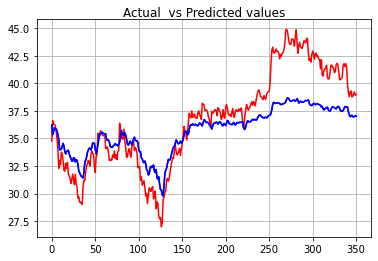

In [ ]:
plt.plot(y_test, label ='Actual', color = 'r')
plt.plot( prediction, label ='Predicted', color = 'b')
plt.grid()
plt.title ('Actual  vs Predicted values' , pad = -50)

We can observe that except at the end of graph, actual and predicted values are close

#Gated Recurrent unit (GRU)


#Exe. 9 First read the data from the .csv file and save it into a string variable using:

In [ ]:
with open ('poems.txt', 'r') as file :
  text = file . read ()
print ( text )

﻿Buffalo Bill’s
defunct
who used to
ride a watersmooth-silver
stallion
and break one two three four five pigeons just like that
Jesus

he was a handsome man
and what i want to know is
how do you like your blueeyed boy
Mister Death

Had I the heaven’s embroidered cloths,
Enwrought with golden and silver light,
The blue and the dim and the dark cloths
Of night and light and the half-light,
I would spread the cloths under your feet:
But I, being poor, have only my dreams;
I have spread my dreams under your feet;
Tread softly because you tread on my dreams.

He clasps the crag with crooked hands;
Close to the sun in lonely lands,
Ring’d with the azure world, he stands.

The wrinkled sea beneath him crawls;
He watches from his mountain walls,
And like a thunderbolt he falls.

Some say the world will end in fire,
Some say in ice.
From what I’ve tasted of desire
I hold with those who favor fire.
But if it had to perish twice,
I think I know enough of hate
To say that for destruction ice
Is al

#Exe. 10 Create two dictionaries char_to_indices and indices_to_char map each unique character to a unique number and vise versa respectively. 


In [ ]:
vocabulary = sorted ( list ( set ( text )) )
vocabulary

['\n',
 ' ',
 '!',
 ',',
 '-',
 '.',
 ':',
 ';',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'H',
 'I',
 'J',
 'M',
 'O',
 'R',
 'S',
 'T',
 'Y',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'y',
 'z',
 '—',
 '’',
 '\ufeff']

In [ ]:
# Char to indices mapping
char_to_indices = dict (( c , i) for i , c in enumerate ( vocabulary ))
char_to_indices

{'\n': 0,
 ' ': 1,
 '!': 2,
 ',': 3,
 '-': 4,
 '.': 5,
 ':': 6,
 ';': 7,
 'A': 8,
 'B': 9,
 'C': 10,
 'D': 11,
 'E': 12,
 'F': 13,
 'H': 14,
 'I': 15,
 'J': 16,
 'M': 17,
 'O': 18,
 'R': 19,
 'S': 20,
 'T': 21,
 'Y': 22,
 'a': 23,
 'b': 24,
 'c': 25,
 'd': 26,
 'e': 27,
 'f': 28,
 'g': 29,
 'h': 30,
 'i': 31,
 'j': 32,
 'k': 33,
 'l': 34,
 'm': 35,
 'n': 36,
 'o': 37,
 'p': 38,
 'q': 39,
 'r': 40,
 's': 41,
 't': 42,
 'u': 43,
 'v': 44,
 'w': 45,
 'y': 46,
 'z': 47,
 '—': 48,
 '’': 49,
 '\ufeff': 50}

In [ ]:
#indices to char mapping
indices_to_char = dict (( i , c) for i , c in enumerate ( vocabulary ))
indices_to_char

{0: '\n',
 1: ' ',
 2: '!',
 3: ',',
 4: '-',
 5: '.',
 6: ':',
 7: ';',
 8: 'A',
 9: 'B',
 10: 'C',
 11: 'D',
 12: 'E',
 13: 'F',
 14: 'H',
 15: 'I',
 16: 'J',
 17: 'M',
 18: 'O',
 19: 'R',
 20: 'S',
 21: 'T',
 22: 'Y',
 23: 'a',
 24: 'b',
 25: 'c',
 26: 'd',
 27: 'e',
 28: 'f',
 29: 'g',
 30: 'h',
 31: 'i',
 32: 'j',
 33: 'k',
 34: 'l',
 35: 'm',
 36: 'n',
 37: 'o',
 38: 'p',
 39: 'q',
 40: 'r',
 41: 's',
 42: 't',
 43: 'u',
 44: 'v',
 45: 'w',
 46: 'y',
 47: 'z',
 48: '—',
 49: '’',
 50: '\ufeff'}

In [ ]:
print ( vocabulary )

['\n', ' ', '!', ',', '-', '.', ':', ';', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'M', 'O', 'R', 'S', 'T', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', '—', '’', '\ufeff']


#Exe. 11 To get valuable data, which we can use to train our model we will split our data up into subsequences with a length of 100 characters using:


In [ ]:
max_length = 100
steps = 5
sentences = []
next_chars = []
for i in range (0 , len ( text ) - max_length , steps ):
  sentences . append ( text [i: i + max_length ])
  next_chars . append ( text [ i + max_length ])

In [ ]:
sentences[:5]

['\ufeffBuffalo Bill’s\ndefunct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four ',
 'alo Bill’s\ndefunct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four five ',
 'ill’s\ndefunct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four five pigeo',
 '\ndefunct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four five pigeons ju',
 'nct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four five pigeons just li']

In [ ]:
next_chars[:5]

['f', 'p', 'n', 's', 'k']

# Exe. 12 Hot encoding

In [ ]:
X = np . zeros (( len ( sentences ) , max_length , len ( vocabulary )) , dtype = np . bool )
y = np . zeros (( len ( sentences ) , len ( vocabulary ) ) , dtype = np . bool )
X[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
# Set 1 at positions where the word is existed in the selected text vector
for i , sentence in enumerate ( sentences ):
  for t , char in enumerate ( sentence ):
    X[i , t , char_to_indices [ char ]] = 1
    y[i , char_to_indices [ next_chars [i ]]] = 1


In [ ]:
X[0]

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [ ]:
print(X.shape)
print(y.shape)

(332, 100, 51)
(332, 51)


In [ ]:
text[0:max_length+1]

'\ufeffBuffalo Bill’s\ndefunct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four f'

# Exe. 13  create model

In [ ]:
from tensorflow.keras.layers import GRU
from keras.optimizers import RMSprop
# initialize model
model = Sequential() 

# Define cell type
model.add(GRU(128, input_shape =(max_length, len(vocabulary)))) 

# Add dense layer 
model.add(Dense(len(vocabulary))) 
 
# Define activation function
model.add(Activation('softmax')) 

# Define optimizer
optimizer = RMSprop(lr = 0.01) 

# compile the model
model.compile(loss ='categorical_crossentropy', optimizer = optimizer)


In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 128)               69504     
_________________________________________________________________
dense_15 (Dense)             (None, 51)                6579      
_________________________________________________________________
activation_4 (Activation)    (None, 51)                0         
Total params: 76,083
Trainable params: 76,083
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(vocabulary)

51

In [ ]:
(51+128+2)*128*3

69504

In [ ]:
(128+1)*51

6579

#Exe. 14 fit the trained model on X and Y datasets by defining a batch size and epochs values. Check loss and accuracy of your model.

In [ ]:
model.fit(X, y, batch_size = 128, epochs = 30)

Epoch 1/30
3/3 [==============================] - 0s 12ms/step - loss: 0.2793
Epoch 2/30
3/3 [==============================] - 0s 12ms/step - loss: 0.3069
Epoch 3/30
3/3 [==============================] - 0s 12ms/step - loss: 0.0558
Epoch 4/30
3/3 [==============================] - 0s 13ms/step - loss: 0.0174
Epoch 5/30
3/3 [==============================] - 0s 13ms/step - loss: 0.0114
Epoch 6/30
3/3 [==============================] - 0s 12ms/step - loss: 0.0057
Epoch 7/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0043
Epoch 8/30
3/3 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 9/30
3/3 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 10/30
3/3 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 11/30
3/3 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 12/30
3/3 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 13/30
3/3 [==============================] - 0s 12ms/st

In [ ]:
loss = model.evaluate(X , y)
loss

11/11 [==============================] - 0s 3ms/step - loss: 1.2258e-04


0.00012257917842362076

#Exe. 15 

In [ ]:
# Helper function to sample an index from probabilites
def sample_index(preds, temperature=1.0):
  # temperature is used to determine degree of freedom the function has while generating text
  # converting prediction vector into numpy array
  preds= np.asarray(preds).astype('float64')
  # Normalizing the predictions array
  preds= np.log(preds) / temperature
  exp_preds= np.exp(preds)
  preds= exp_preds / np.sum(exp_preds)

  # Creates an array of probabilities signifying the prob of each char to be the next char in the generated text
  probas = np.random.multinomial(1,preds, 1) #  to characterize the probability of each occurring outcome
  # return the char with max probability
  return np.argmax(probas)

In [ ]:
def sample_probas(preds, temperature=1.0):
  # function to sample index from probability array
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds) / temperature
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1, preds, 1)
  return preds

In [ ]:
# For probabilities between 0 and 1, we can test different values of temperatur
x_seq = np.linspace(0.001,1,100)
x_seq


array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.30372727, 0.31381818, 0.32390909, 0.334     , 0.34409091,
       0.35418182, 0.36427273, 0.37436364, 0.38445455, 0.39454545,
       0.40463636, 0.41472727, 0.42481818, 0.43490909, 0.445     ,
       0.45509091, 0.46518182, 0.47527273, 0.48536364, 0.49545455,
       0.50554545, 0.51563636, 0.52572727, 0.53581818, 0.54590909,
       0.556     , 0.56609091, 0.57618182, 0.58627273, 0.59636364,
       0.60645455, 0.61654545, 0.62663636, 0.63672727, 0.64681818,
       0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772

In [ ]:
temperature= 0.2

def tran_x(x_seq,temperature):
  x_seq_exp = np.exp(np.log(x_seq)/ temperature)
  y_seq = x_seq_exp / np.sum(x_seq_exp)
  return y_seq

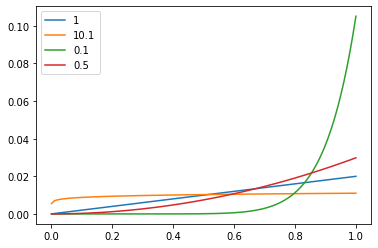

In [ ]:
plt.plot(x_seq, tran_x(x_seq,1),label="1")
plt.plot(x_seq, tran_x(x_seq,10.1),label="10.1")
plt.plot(x_seq, tran_x(x_seq,0.1),label="0.1")
plt.plot(x_seq, tran_x(x_seq,0.5),label="0.5")
plt.legend()

# Text generator

In [ ]:
import random
def generate_text(length, diversity):
  # Generate random starting text
  start_index = random.randint(0,len(text)-max_length-1)
  # Defining generated text
  generated = ''
  sentence = text[start_index:start_index + max_length]
  generated = generated + sentence
  # generating new text of given length
  for i in range(length):
    # initialize prediction vector
    x_pred = np.zeros((1,max_length, len(vocabulary)))
    for t, char in enumerate(sentence):
      x_pred[0, t, char_to_indices[char]] =1 
    # Make predictions
    preds = model.predict(x_pred, verbose=0)[0]

    # Getting the index of the next most probable index
    next_index = sample_index(preds, diversity)

    # Getting the next most probable char using mapping built
    next_char = indices_to_char[next_index]

    # Generate new text
    generated = generated + next_char
    sentence = sentence[1:] + next_char
  return generated

In [ ]:
print(generate_text(300, 0.5))

ight and light and the half-light,
I would spread the cloths under your feet:
But I, being poor, havin  te als;d thavly whave y he caas  thamin  thave pe hand teaver anderero fte caase an the caase youwthe wthe caas  at ass  touthand thime passg it at he fassg it at he fasre caouw ha whag ha whag thimerone y same wasd it and lasd laor le caave y he caas  teamey thave hassg eaass  thave yass foteav


we can observe that the generated text is not completely matching the original one